##Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##Import The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Riset/dataset tanaman padi kabupaten minahasa.csv')
df

,Tahun,Produksi Beras (ton),Luas Panen (Ha),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (Hari),Rata-rata Suhu (Celcius),Rata-rata Kelembapan Udara
0,2003,68322.00,15560.00,NaN,NaN,NaN,NaN
1,2005,51531.00,10998.00,NaN,NaN,NaN,NaN
2,2007,64292.00,13050.00,NaN,NaN,NaN,NaN
3,2008,57859.00,11800.00,NaN,NaN,NaN,NaN
4,2009,65941.00,13500.00,NaN,NaN,NaN,NaN
5,2010,70482.00,13793.00,NaN,NaN,NaN,NaN
6,2011,82448.00,16473.00,NaN,NaN,NaN,NaN
7,2012,82475.00,16535.00,2207.757,NaN,NaN,NaN
8,2013,86456.00,16162.00,2706.422,NaN,NaN,NaN
9,2014,89455.00,18032.00,2237.252,NaN,NaN,NaN


#Data Understanding

In [ ]:
df.describe()

,Tahun,Produksi Beras (ton),Luas Panen (Ha),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (Hari),Rata-rata Suhu (Celcius),Rata-rata Kelembapan Udara
count,19.000000,19.000000,19.000000,12.000000,5.000000,5.000000,4.000000
mean,2013.842105,58543.513158,13173.477895,2177.867667,200.150000,23.372000,84.815000
std,5.899747,27295.993978,3798.802725,434.341435,38.470606,0.813185,2.781564
min,2003.000000,18078.000000,7053.000000,1459.200000,149.750000,22.800000,80.670000
25%,2009.500000,27025.685000,9881.155000,1842.750000,185.000000,22.900000,84.600000
50%,2014.000000,65941.000000,13500.000000,2222.504500,189.000000,23.100000,85.975000
75%,2018.500000,84239.500000,16504.000000,2408.332250,232.000000,23.270000,86.190000
max,2023.000000,89455.000000,18032.000000,2874.260000,245.000000,24.790000,86.640000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tahun                       19 non-null     int64  
 1   Produksi Beras (ton)        19 non-null     float64
 2   Luas Panen (Ha)             19 non-null     float64
 3   Jumlah Curah Hujan (mm)     12 non-null     float64
 4   Jumlah Hari Hujan (Hari)    5 non-null      float64
 5   Rata-rata Suhu (Celcius)    5 non-null      float64
 6   Rata-rata Kelembapan Udara  4 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


## Data Preparation

Checking Data Duplicate

In [ ]:
# Check for duplicate rows and count them
duplicate_counts = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='count')

# Display the duplicate rows and their counts
print("Duplicate Rows:")
print(duplicate_counts)

Duplicate Rows:
Empty DataFrame
Columns: [Tahun, Produksi Beras (ton), Luas Panen (Ha), Jumlah Curah Hujan (mm), Jumlah Hari Hujan (Hari), Rata-rata Suhu (Celcius), Rata-rata Kelembapan Udara, count]
Index: []


Checking Missing Value

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / len(df)) * 100

# Create a new DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': missing_values,
    'Percentage Missing (%)': percentage_missing
})

# Print the missing data information
print(missing_data_info)

                                           Column Name  Missing Values  \
Tahun                                            Tahun               0   
Produksi Beras (ton)              Produksi Beras (ton)               0   
Luas Panen (Ha)                        Luas Panen (Ha)               0   
Jumlah Curah Hujan (mm)        Jumlah Curah Hujan (mm)               7   
Jumlah Hari Hujan (Hari)      Jumlah Hari Hujan (Hari)              14   
Rata-rata Suhu (Celcius)      Rata-rata Suhu (Celcius)              14   
Rata-rata Kelembapan Udara  Rata-rata Kelembapan Udara              15   

                            Percentage Missing (%)  
Tahun                                     0.000000  
Produksi Beras (ton)                      0.000000  
Luas Panen (Ha)                           0.000000  
Jumlah Curah Hujan (mm)                  36.842105  
Jumlah Hari Hujan (Hari)                 73.684211  
Rata-rata Suhu (Celcius)                 73.684211  
Rata-rata Kelembapan Udara          

Handling Missing Value

In [ ]:
df['Jumlah Curah Hujan (mm)'] = df['Jumlah Curah Hujan (mm)'].fillna(df['Jumlah Curah Hujan (mm)'].mean())
df['Jumlah Hari Hujan (Hari)'] = df['Jumlah Hari Hujan (Hari)'].fillna(df['Jumlah Hari Hujan (Hari)'].mean())
df['Rata-rata Suhu (Celcius)'] = df['Rata-rata Suhu (Celcius)'].fillna(df['Rata-rata Suhu (Celcius)'].mean())
df['Rata-rata Kelembapan Udara'] = df['Rata-rata Kelembapan Udara'].fillna(df['Rata-rata Kelembapan Udara'].mean())

Checking Missing Value After Handling

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / len(df)) * 100

# Create a new DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': missing_values,
    'Percentage Missing (%)': percentage_missing
})

# Print the missing data information
print(missing_data_info)

                                           Column Name  Missing Values  \
Tahun                                            Tahun               0   
Produksi Beras (ton)              Produksi Beras (ton)               0   
Luas Panen (Ha)                        Luas Panen (Ha)               0   
Jumlah Curah Hujan (mm)        Jumlah Curah Hujan (mm)               0   
Jumlah Hari Hujan (Hari)      Jumlah Hari Hujan (Hari)               0   
Rata-rata Suhu (Celcius)      Rata-rata Suhu (Celcius)               0   
Rata-rata Kelembapan Udara  Rata-rata Kelembapan Udara               0   

                            Percentage Missing (%)  
Tahun                                          0.0  
Produksi Beras (ton)                           0.0  
Luas Panen (Ha)                                0.0  
Jumlah Curah Hujan (mm)                        0.0  
Jumlah Hari Hujan (Hari)                       0.0  
Rata-rata Suhu (Celcius)                       0.0  
Rata-rata Kelembapan Udara          

In [ ]:
df

,Tahun,Produksi Beras (ton),Luas Panen (Ha),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (Hari),Rata-rata Suhu (Celcius),Rata-rata Kelembapan Udara
0,2003,68322.00,15560.00,2177.867667,200.15,23.372,84.815
1,2005,51531.00,10998.00,2177.867667,200.15,23.372,84.815
2,2007,64292.00,13050.00,2177.867667,200.15,23.372,84.815
3,2008,57859.00,11800.00,2177.867667,200.15,23.372,84.815
4,2009,65941.00,13500.00,2177.867667,200.15,23.372,84.815
5,2010,70482.00,13793.00,2177.867667,200.15,23.372,84.815
6,2011,82448.00,16473.00,2177.867667,200.15,23.372,84.815
7,2012,82475.00,16535.00,2207.757000,200.15,23.372,84.815
8,2013,86456.00,16162.00,2706.422000,200.15,23.372,84.815
9,2014,89455.00,18032.00,2237.252000,200.15,23.372,84.815


Checking Outliers

In [ ]:
  # Calculate the first quartile (Q1) for all numeric columns
Q1 = df.select_dtypes(include=['int', 'float']).quantile(0.25)

# Calculate the third quartile (Q3) for all numeric columns
Q3 = df.select_dtypes(include=['int', 'float']).quantile(0.75)

# Calculate the IQR (Interquartile Range) for all numeric columns
IQR = Q3 - Q1

# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Calculate the lower bound for outliers for all numeric columns
lower_bound = Q1 - threshold * IQR

# Calculate the upper bound for outliers for all numeric columns
upper_bound = Q3 + threshold * IQR

# Count the number of outliers for each numeric column
outliers_count = ((df.select_dtypes(include=['int', 'float']) < lower_bound) | (df.select_dtypes(include=['int', 'float']) > upper_bound)).sum()

# Calculate the total number of rows
total_rows = len(df)

# Calculate the percentage of outliers for each numeric column
percentage_outliers = (outliers_count / total_rows) * 100

# Create a DataFrame to store the results
outliers_df = pd.DataFrame({'Column': df.select_dtypes(include=['int', 'float']).columns, 'Percentage Outliers': percentage_outliers})

# Print the percentage of outliers for each numeric column
print(outliers_df)

                                                Column  Percentage Outliers
Tahun                                            Tahun             0.000000
Produksi Beras (ton)              Produksi Beras (ton)             0.000000
Luas Panen (Ha)                        Luas Panen (Ha)             0.000000
Jumlah Curah Hujan (mm)        Jumlah Curah Hujan (mm)            36.842105
Jumlah Hari Hujan (Hari)      Jumlah Hari Hujan (Hari)            26.315789
Rata-rata Suhu (Celcius)      Rata-rata Suhu (Celcius)            26.315789
Rata-rata Kelembapan Udara  Rata-rata Kelembapan Udara            21.052632


#Exploratory Data Analysis (EDA)

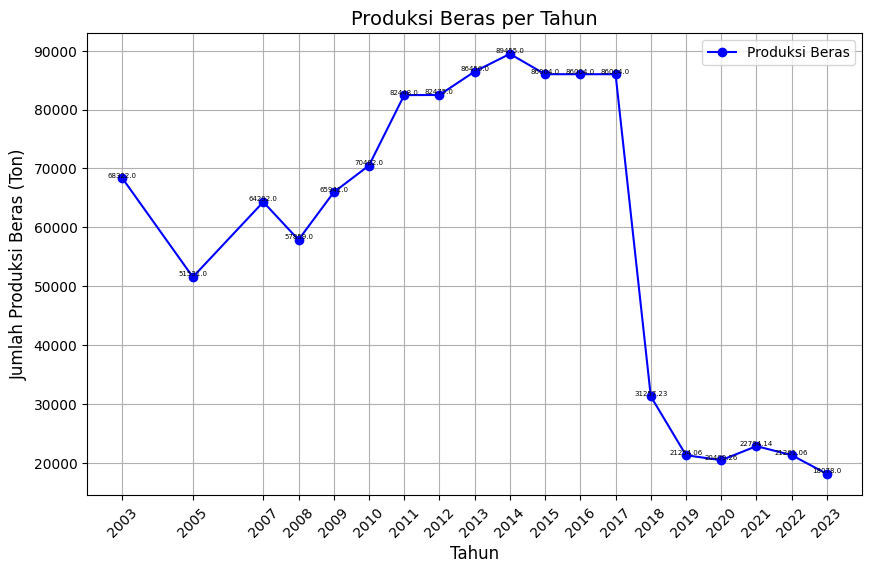

In [ ]:

tahun_produksi = df['Tahun']
jumlah_produksi = df['Produksi Beras (ton)']

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(tahun_produksi, jumlah_produksi, marker='o', color='b', linestyle='-', label='Produksi Beras')

# Menambahkan judul dan label
plt.title('Produksi Beras per Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Produksi Beras (Ton)', fontsize=12)


# Mengatur agar sumbu x menampilkan tahun sebagai integer
plt.xticks(tahun_produksi, rotation=45)  # Pastikan tahun muncul sebagai label di sumbu x

# Menambahkan nilai di setiap titik
for i in range(len(tahun_produksi)):
    plt.text(tahun_produksi[i], jumlah_produksi[i], f'{jumlah_produksi[i]}', fontsize=5, ha='center', va='bottom')

# Menampilkan grid dan legenda
plt.grid(True)
plt.legend()

# Menampilkan chart
plt.show()

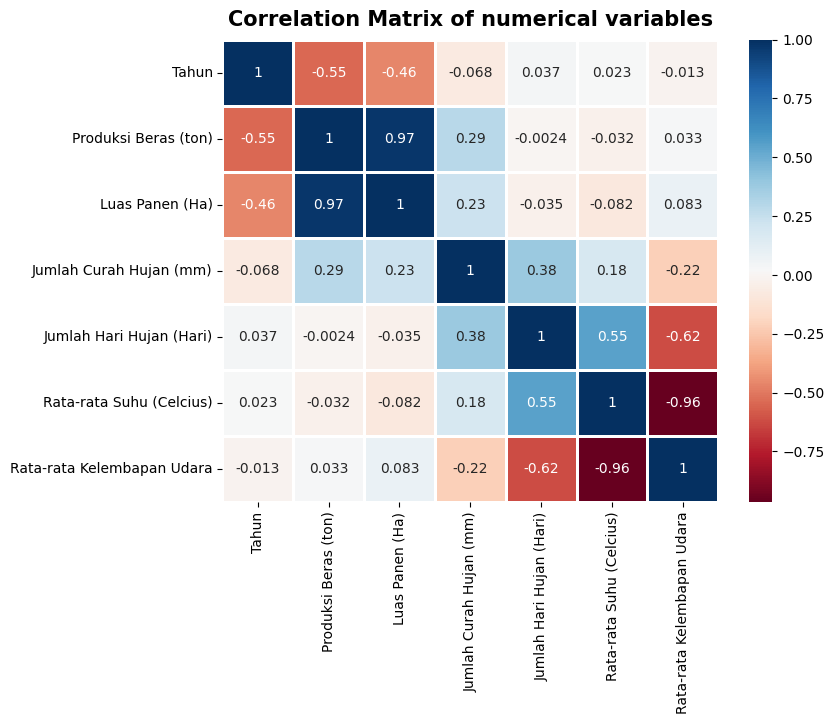

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu', linewidths=1)
plt.title('Correlation Matrix of numerical variables',fontsize=15, fontweight='bold', pad=10)
plt.show()

#Feature Engineering

In [ ]:
# Menghitung Produktivitas (Ton per Ha)
df['Produktivitas Hasil Panen (Ton/Ha)'] = df['Produksi Beras (ton)'] / df['Luas Panen (Ha)']

# Menampilkan beberapa baris pertama untuk memeriksa hasil
df[['Tahun', 'Produksi Beras (ton)', 'Luas Panen (Ha)', 'Produktivitas Hasil Panen (Ton/Ha)']]

,Tahun,Produksi Beras (ton),Luas Panen (Ha),Produktivitas Hasil Panen (Ton/Ha)
0,2003,68322.00,15560.00,4.390874
1,2005,51531.00,10998.00,4.685488
2,2007,64292.00,13050.00,4.926590
3,2008,57859.00,11800.00,4.903305
4,2009,65941.00,13500.00,4.884519
5,2010,70482.00,13793.00,5.109983
6,2011,82448.00,16473.00,5.005039
7,2012,82475.00,16535.00,4.987904
8,2013,86456.00,16162.00,5.349338
9,2014,89455.00,18032.00,4.960903


In [ ]:
df

,Tahun,Produksi Beras (ton),Luas Panen (Ha),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (Hari),Rata-rata Suhu (Celcius),Rata-rata Kelembapan Udara,Produktivitas Hasil Panen (Ton/Ha)
0,2003,68322.00,15560.00,2177.867667,200.15,23.372,84.815,4.390874
1,2005,51531.00,10998.00,2177.867667,200.15,23.372,84.815,4.685488
2,2007,64292.00,13050.00,2177.867667,200.15,23.372,84.815,4.926590
3,2008,57859.00,11800.00,2177.867667,200.15,23.372,84.815,4.903305
4,2009,65941.00,13500.00,2177.867667,200.15,23.372,84.815,4.884519
5,2010,70482.00,13793.00,2177.867667,200.15,23.372,84.815,5.109983
6,2011,82448.00,16473.00,2177.867667,200.15,23.372,84.815,5.005039
7,2012,82475.00,16535.00,2207.757000,200.15,23.372,84.815,4.987904
8,2013,86456.00,16162.00,2706.422000,200.15,23.372,84.815,5.349338
9,2014,89455.00,18032.00,2237.252000,200.15,23.372,84.815,4.960903


In [ ]:
from google.colab import files

#save preprocessed dataset into csv
df.to_csv('preprocessed_dataset.csv', index=False)  # Simpan dataset ke file CSV tanpa kolom indeks

#download
files.download('preprocessed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Modeling (Linear Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df[['Luas Panen (Ha)','Jumlah Curah Hujan (mm)','Jumlah Hari Hujan (Hari)','Rata-rata Suhu (Celcius)','Rata-rata Kelembapan Udara']]
#X = df[['Luas Panen (Ha)','Jumlah Curah Hujan (mm)']]
y = df['Produksi Beras (ton)']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

#Model Evalution

In [ ]:
# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# R-squared
r_squared = r2_score(y_test, y_pred)

# Cetak hasil
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)

Mean Squared Error (MSE): 49631878.49107817
Root Mean Squared Error (RMSE): 7044.989601914127
Mean Absolute Error (MAE): 6797.627169818243
R-squared (R²): 0.6674186892591518


In [ ]:
df_actual_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_actual_pred

,Actual,Predicted
0,68322.0,75130.155399
5,70482.0,62617.375745
11,86004.0,89815.677415
1,51531.0,42824.948390


#Feature Importance (Permutation Importance)

In [ ]:
from sklearn.inspection import permutation_importance

# Menghitung permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Menyusun hasil dalam DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df)

                      Feature  Importance
0             Luas Panen (Ha)    2.518117
2    Jumlah Hari Hujan (Hari)    0.000000
3    Rata-rata Suhu (Celcius)    0.000000
4  Rata-rata Kelembapan Udara    0.000000
1     Jumlah Curah Hujan (mm)   -0.014473


In [ ]:
#Luas panen=11657, curah hujan=1894.895, Hari hujan= 198.5, Rata suhu = 22.8 , Rata kelembapan udara = 83.19, produktivitas = 4.97
input_data = np.array([[11657, 1894.895, 198.5, 22.8, 83.19]])

prediction = model.predict(input_data)
print("Prediksi Jumlah Produksi Beras (Ton):", prediction)

Prediksi Jumlah Produksi Beras (Ton): [45075.62801313]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files
import pickle

# Menyimpan Model ke file .pkl
with open('model_linear_regression.pkl', 'wb') as file:
    pickle.dump(model, file)

# Mendownload file
#files.download('model_linear_regression.pkl')